In [4]:
!pip install contextily

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 125.4/125.4 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
    --------------------------------------- 0.6/25.5 MB 19.5 MB/s eta 0:00:02
   -- ------------------------------------- 1.6/25.5 MB 25.8 MB/s eta 0:00:01
   ----- ---------------------------------- 3.3/25.5 MB 26.1 MB/s eta 0:00:01
   ------- -------------------------------- 4.5/25.5 MB 28.6 MB/s eta 0:00:01
   --------- ------------------------------ 6.1/25.5 MB 30.0 MB/s eta 0:00:01
   ----------- ---------------------------- 7.4/25.5 MB 29.7 MB/s eta 0:00:01
   ------------- -------------------------- 8.7/25.5 MB 29.1 MB/s eta 0:00:01
   -------------- ------------------------- 9.3/25.5 MB 28.4 MB/s eta 0:00:01
   ---------------- ----------------------- 10.8/25.5 MB 27.3 MB/s eta 0:00:0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import requests
import shapely

In [8]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [10]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

In [12]:
path_shapefile = 'upath17'
umbra_shapefile = 'umbra17'
penumbra_shapefile = 'penum17'

shapefile_exts = ['.shp', '.shx', '.dbf', '.prj']
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/eclipse/'

for shapefile in [path_shapefile, umbra_shapefile, penumbra_shapefile]:
  for ext in shapefile_exts:
    url = data_url + shapefile + ext
    download(url)

Downloaded data\upath17.shp
Downloaded data\upath17.shx
Downloaded data\upath17.dbf
Downloaded data\upath17.prj
Downloaded data\umbra17.shp
Downloaded data\umbra17.shx
Downloaded data\umbra17.dbf
Downloaded data\umbra17.prj
Downloaded data\penum17.shp
Downloaded data\penum17.shx
Downloaded data\penum17.dbf
Downloaded data\penum17.prj


In [14]:
path_shapefile_path = os.path.join(
    data_folder, path_shapefile + '.shp')
path_gdf = gpd.read_file(path_shapefile_path)
path_gdf

,Name,Time0,Time1,geometry
0,UmbraPath,17:00,19:50,"POLYGON ((-130.08398 45.36563, -130.07227 45.3..."


In [18]:
umbra_shapefile_path = os.path.join(
    data_folder, umbra_shapefile + '.shp')
umbra_gdf = gpd.read_file(umbra_shapefile_path)
umbra_gdf

,Name,Time,TZ,geometry
0,Umbra01,10:00,PDT,"POLYGON ((-141.73242 44.78022, -141.7207 44.78..."
1,Umbra02,10:10,PDT,"POLYGON ((-130.59961 45.3565, -130.58789 45.35..."
2,Umbra03,10:20,PDT,"POLYGON ((-121.85742 45.20222, -121.8457 45.20..."
3,Umbra04,11:30,MDT,"POLYGON ((-114.7793 44.60543, -114.76758 44.60..."
4,Umbra05,11:40,MDT,"POLYGON ((-108.63867 43.72656, -108.62695 43.7..."
5,Umbra06,11:50,MDT,"POLYGON ((-103.22461 42.62584, -103.21289 42.6..."
6,Umbra07,1:00,CDT,"POLYGON ((-98.30273 41.35848, -98.29102 41.359..."
7,Umbra08,1:10,CDT,"POLYGON ((-93.9082 39.92951, -93.89648 39.9304..."
8,Umbra09,1:20,CDT,"POLYGON ((-89.73633 38.38195, -89.72461 38.382..."
9,Umbra10,1:30,CDT,"POLYGON ((-85.93945 36.70659, -85.92773 36.707..."


In [30]:
providers = cx.providers
providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<ins

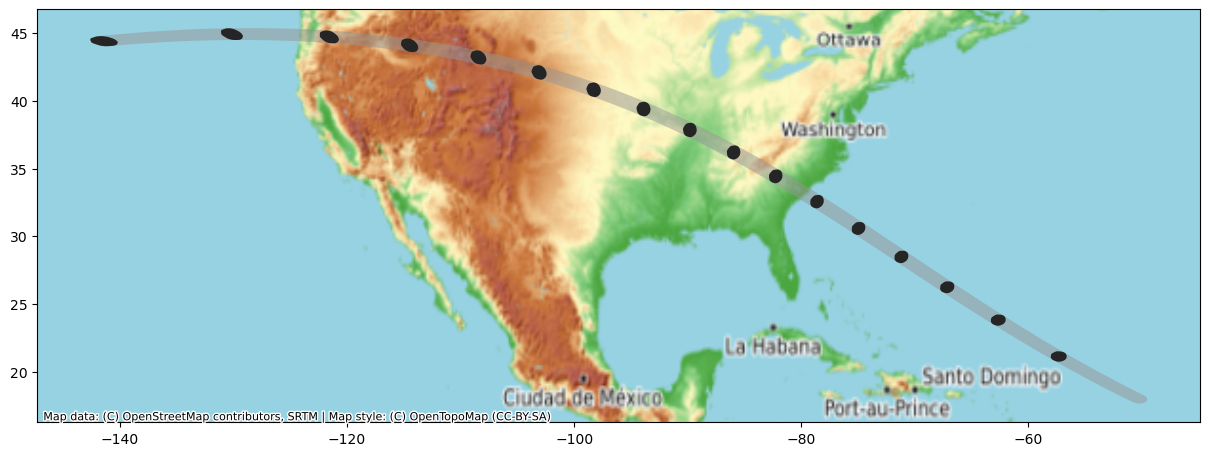

In [38]:
fig, ax= plt.subplots(1,1)
fig.set_size_inches(15,7)

path_gdf.plot(
    ax=ax,
    facecolor='#969696',
    edgecolor='none',
    alpha=0.5)

umbra_gdf.plot(
    ax=ax,
    facecolor='#252525',
    edgecolor='none')

cx.add_basemap(
    ax,
    crs=path_gdf.crs,
    source=cx.providers.OpenTopoMap)

plt.show()